# Explore and Process
In this notebook we explore the dataset and we process the data, making different tasks:
* Tokenization
* Delete the Stop Words
* Remove Punctuation
* Lemmatization

## Import Libraries
We used various libraries: pandas to read the dataset, pandarallel for parallel processing tasks on the dataset, and nltk for completing various preprocessing tasks.


In [1]:
import pandas as pd
from pandarallel import pandarallel
import ast
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

## Explore the dataset

### Read the datasets

In [2]:
dataRew=pd.read_json('../Dataset/IMDB_reviews.json',lines=True)
dataMovie=pd.read_json('../Dataset/IMDB_movie_details.json',lines=True)

In [3]:
dataRew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [4]:
dataRew[dataRew['review_text']=='']

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary


In [5]:
dataMovie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB


### Some plot synopsis are not present
We exclude films where the synopsis is not present, as the plot summary does not contain plot twists usefull for detect spoiler.

In [6]:
dataMovie[dataMovie["plot_synopsis"]=='']

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
10,tt0107131,"Three pets (Chance, a young dog unfamiliar wit...",1h 24min,"[Adventure, Comedy, Drama]",6.9,1993-02-12,
11,tt0110364,"In Urbania, Ohio, snobby ex-football star Kevi...",1h 47min,"[Comedy, Family, Sport]",6.3,1994-10-14,
22,tt0101700,The story is centered on a microcosm of a post...,1h 39min,"[Comedy, Crime]",7.7,1992-04-03,
24,tt0102768,Henry is a lawyer who survives a shooting only...,1h 48min,"[Drama, Romance]",6.7,1991-07-10,
...,...,...,...,...,...,...,...
1556,tt0285531,"Four childhood friends, Jonesy, Beaver, Pete a...",2h 14min,"[Drama, Horror, Sci-Fi]",5.5,2003-03-21,
1564,tt0914798,Young Bruno lives a wealthy lifestyle in prewa...,1h 34min,"[Drama, War]",7.8,2008-11-26,
1566,tt4047038,Centers on the titular holistic detective who ...,1h,"[Comedy, Mystery, Sci-Fi]",8.4,2017-04-01,
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,


In [7]:
dataMovie=dataMovie[dataMovie["plot_synopsis"]!='']

In [8]:
dataMovie[dataMovie["plot_synopsis"]=='']

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis


In [9]:
dataMovie.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
5,tt0286716,"Bruce Banner, a brilliant scientist with a clo...",2h 18min,"[Action, Sci-Fi]",5.7,2003-06-20,Bruce Banner (Eric Bana) is a research scienti...


In [10]:
dataRew.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


### Compute the average,min,max length of reviews and the plot synopsis

In [12]:
ColonnaL=dataRew["review_text"].apply(len)

In [13]:
ColonnaL.mean()

1460.5535246631457

The average length of the reviews is 1460

In [14]:
ColonnaL.min()

18

Minimum review length: 18 

In [15]:
ColonnaL.max()

14963

Maximum review length: 14963

### Plot synopsis

In [17]:
tempMovie=dataMovie["plot_synopsis"].apply(len)

In [18]:
tempMovie.mean()

9644.488424197161

The average length of the plot synopsis is 9644

In [19]:
tempMovie.min()

45

Minimum plot synopsis length: 45 

In [20]:
tempMovie.max()

63904

Maximum plot synopsis length: 63904

### Compute the min and max data of the review

In [14]:
unique_data=dataRew["review_date"].unique()

In [15]:
data = pd.to_datetime(unique_data)

In [16]:
unique_data

array(['10 February 2006', '6 September 2000', '3 August 2001', ...,
       '28 July 1998', '3 September 1998', '31 August 1998'], dtype=object)

In [17]:
data

DatetimeIndex(['2006-02-10', '2000-09-06', '2001-08-03', '2002-09-01',
               '2004-05-20', '2004-08-12', '2005-10-09', '2012-02-04',
               '2008-10-24', '2011-07-30',
               ...
               '2002-01-01', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '1998-09-04', '1998-08-28', '1998-07-28',
               '1998-09-03', '1998-08-31'],
              dtype='datetime64[ns]', length=7104, freq=None)

In [18]:
data.min()

Timestamp('1998-07-28 00:00:00')

In [19]:
data.max()

Timestamp('2018-01-07 00:00:00')

### Distribution of spoilers

In [5]:
values=dataRew["is_spoiler"].value_counts()

Text(0.5, 1.0, 'Distribution of Spoiler in reviews')

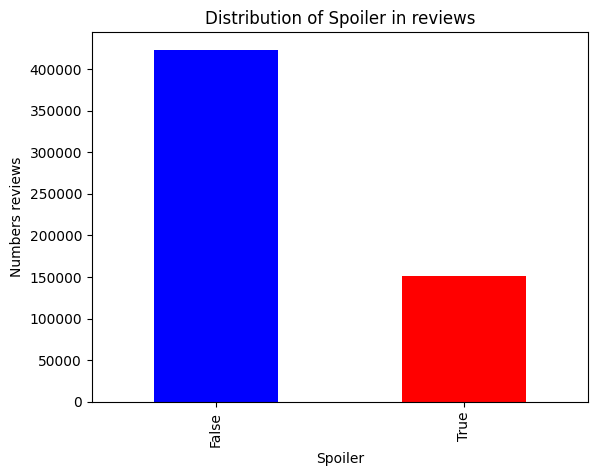

In [6]:
values.plot(kind='bar',color=['blue','red'])
plt.xlabel('Spoiler')
plt.ylabel('Numbers reviews')
plt.title('Distribution of Spoiler in reviews')

### Estimation of pre-announced spoilers (reviews containing spoiler alert)

In [11]:
only_text = dataRew[['movie_id', 'review_text','is_spoiler']]

In [21]:
#Estimation: select reviews with "spoiler" word and exclude negations like "spoiler free" "not a spoiler" ecc.
filtered_reviews = only_text[
    only_text['review_text'].str.contains('spoiler', case=False) &  # contains "spoiler"
    ~only_text['review_text'].str.contains('no spoiler|not a spoiler|non spoiler|not to spoiler|not spoiler|any spoiler|[^not] spoilers* free', case=False)  # doesn't contain exclusion phrases
]


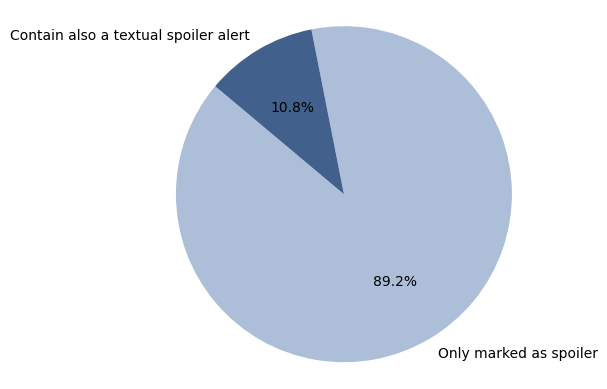

In [24]:
spoilers = only_text[only_text['is_spoiler'] == True]
labels_3 = ['Only marked as spoiler','Contain also a textual spoiler alert',]
values_2 = [len(spoilers), len(filtered_reviews[filtered_reviews['is_spoiler'] == True])]
colors_2 = ['#ACBED8','#41608b']

plt.pie(values_2, labels=labels_3, colors=colors_2, autopct='%1.1f%%', startangle=140)

# Visualizzazione del plot
plt.axis('equal')
plt.show()


### More exploration

<BarContainer object of 2 artists>

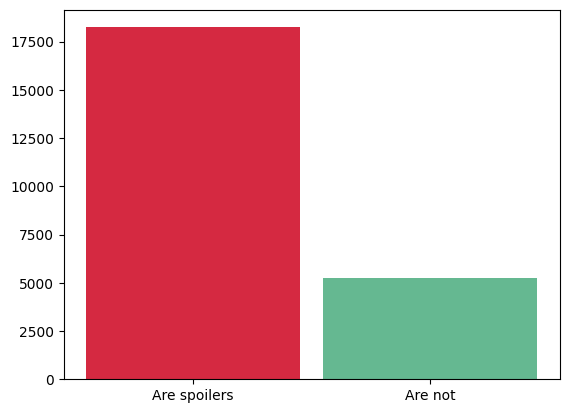

In [25]:
#HOW MANY OF THE "ANNOUNCED SPOILERS" ARE ACTUALLY SPOILERS?
labels_2 = ['Are spoilers', 'Are not']
values_2 = [len(filtered_reviews[filtered_reviews['is_spoiler'] == True]),len(filtered_reviews[filtered_reviews['is_spoiler'] == False]) ]
colors_2 = ['#D52941', '#65B891']
plt.bar(labels_2, values_2, color=colors_2, width=0.9)

array([[<Axes: title={'center': 'count_total'}>]], dtype=object)

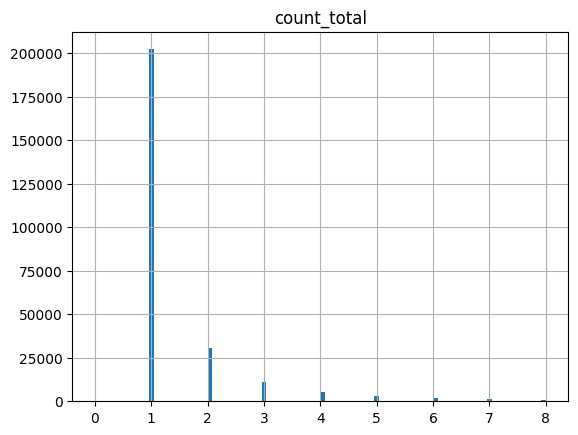

In [28]:
#Number of reviews per user
user_total_comments = dataRew.groupby('user_id').size().reset_index(name='count_total')
user_total_comments.hist(bins=100, range=(0,8))

In [29]:
user_total_comments.count_total.mean()

2.1788069413493187

## Processing Text
In this part of the notebook, we perform the process of tokenization, removal of stop words and punctuation, and lemmatization.

## Review Cleaning

In [ ]:
# inizialize pandarallel for work in parallel on the dataset

pandarallel.initialize(progress_bar=True)

In [ ]:
# this function is used to read the partial dataset, if we save dataset at each operation.
def takeDataset(x):
    ## When i read the csv, the last column is not an array but a string
    dataRew=pd.read_csv(x)
    ## Converting the string in an array before delete stop words
    dataRew["clean_review"]=dataRew.loc[:,"clean_review"].parallel_apply(ast.literal_eval)

### Tokenization

In [ ]:
nltk.download('punkt')

In [ ]:
def tokenize_text(text):
    from nltk.tokenize import WordPunctTokenizer
    tokenizer=WordPunctTokenizer()
    return tokenizer.tokenize(text)


In [ ]:
dataRew['clean_review'] = dataRew.loc[:,"review_text"].parallel_apply(tokenize_text)

In [ ]:
#dataRew.to_csv('../Dataset/datiCleanTokenize.csv', index=False)

### Delete StopWords

In [ ]:
nltk.download('stopwords')

In [ ]:
def remove_Stop(x):
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  filtered_sentence = [word for word in x if word.lower() not in stop_words]
  return filtered_sentence

In [ ]:
dataRew['clean_review']=dataRew.loc[:,'clean_review'].parallel_apply(remove_Stop)

In [ ]:
#dataRew.to_csv('../Dataset/datiCleanTokenizeStop.csv', index=False)

### Regex to  remove of punct.

In [ ]:
def remove_punct2(words_list):
    import re
    pattern=re.compile(r'[^\w\s]')
    clean_words=[word for word in words_list if not pattern.search(word)]
    return clean_words

In [ ]:
dataRew['clean_review']=dataRew.loc[:,'clean_review'].parallel_apply(remove_punct2)

In [ ]:
dataRew["clean_review"]

In [ ]:
dataRew.loc[:,"clean_review"]

In [ ]:
#dataRew.to_csv('../Dataset/datiCleanTokenizeStopNotPun.csv', index=False)

### Lemmatization

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
def lemmatize(text):
    from nltk.stem import WordNetLemmatizer
    lemmatizer=WordNetLemmatizer()
    lem_token=[lemmatizer.lemmatize(token.lower()) for token in text]
    return lem_token


In [ ]:
dataRew['clean_review']=dataRew.loc[:,'clean_review'].parallel_apply(lemmatize)

In [ ]:
dataRew.loc[:,"clean_review"]

In [ ]:
#dataRew.to_csv('../Dataset/datiClean.csv', index=False)

### Stemming
We also tried stemming in addition to lemmatization, but we opted for the latter since stemming appears too "aggressive".

In [ ]:
def stem_text(x):
  from nltk.stem import SnowballStemmer
  stemmer=SnowballStemmer('english')
  s_words=[stemmer.stem(word) for word in x]
  return s_words

In [ ]:
def ApplyStem:
    dataRew['clean_review']=dataRew.loc[:,'clean_review'].parallel_apply(stem_text)

## Processing synopsis of the plot
In this part we apply the same processes we made for text review

### Tokenize

In [ ]:
def tokenize_text(text):
   from nltk.tokenize import WordPunctTokenizer
   tokenizer=WordPunctTokenizer()
   return tokenizer.tokenize(text)

In [ ]:
dataMovie["plot_clean"]=dataMovie.loc[:,"plot_synopsis"].parallel_apply(tokenize_text)

In [ ]:
dataMovie["plot_clean"]

### Remove Stop Words

In [ ]:
nltk.download('stopwords')
def remove_Stop(x):
   from nltk.corpus import stopwords
   stop_words=set(stopwords.words('english'))
   filtered_sentence=[word for word in x if word.lower() not in stop_words]
   return filtered_sentence

In [ ]:
dataMovie["plot_clean"]=dataMovie.loc[:,"plot_clean"].parallel_apply(remove_Stop)

In [ ]:
dataMovie["plot_clean"]

### Remove punctuation

In [ ]:
def remove_punct(x):
   import string
   senzaP=[parola for parola in x if parola not in string.punctuation]
   return senzaP

In [ ]:
dataMovie["plot_clean"]=dataMovie.loc[:,"plot_clean"].parallel_apply(remove_punct)

In [ ]:
dataMovie["plot_clean"]

## Lemmatizatiom

In [ ]:
def lemmatize(text):
    from nltk.stem import WordNetLemmatizer
    lemmatizer=WordNetLemmatizer()
    lem_token=[lemmatizer.lemmatize(token.lower()) for token in text]
    return lem_token


In [ ]:
dataMovie['plot_clean']=dataMovie.loc[:,'plot_clean'].parallel_apply(lemmatize)

### Stemming
Not used, we also tried stemming in addition to lemmatization, but we opted for the latter since stemming appears too "aggressive".

In [ ]:
def Stem(x):
   from nltk.stem import PorterStemmer
   stemmer=PorterStemmer()
   words=[stemmer.stem(word) for word in x]
   return words

### Remove Punctuaction 

In [ ]:
dataMovie['plot_clean']=dataMovie.loc[:,'plot_clean'].parallel_apply(remove_punct2)

In [ ]:
dataMovie.to_csv("../Dataset/movieclean.csv")

In [ ]:
dataMovie